In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import datetime

In [20]:
df = pd.read_csv(
    'fcc-forum-pageviews.csv', 
    parse_dates=True,
    index_col='date'
    )
fr = pd.read_csv(
    'fcc-forum-pageviews.csv', 
    parse_dates=True,
    index_col='date'
    )

In [21]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [76]:
top_views = (df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))
low_views = (df['value'] < df['value'].quantile(0.025))
df = df[top_views]
df

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923
...,...
2019-11-03,130118
2019-11-09,115642
2019-11-10,117717


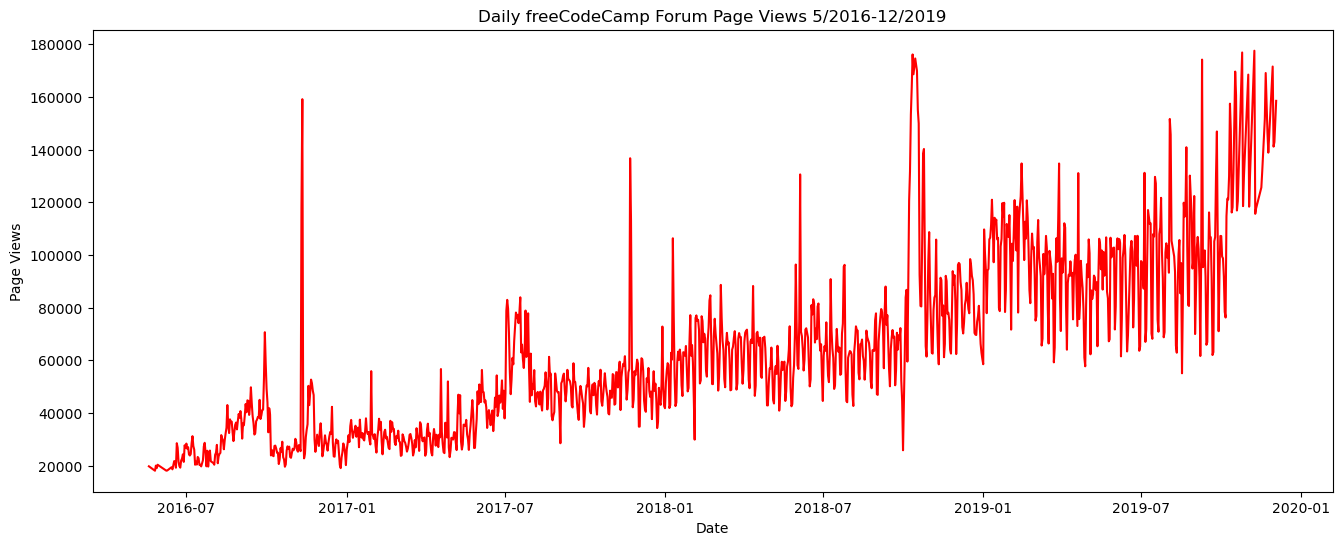

In [43]:
x_axis = df.index
y_axis = df['value'].tolist()
plt.figure(figsize=(16,6))
plt.plot(x_axis, y_axis, color='red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

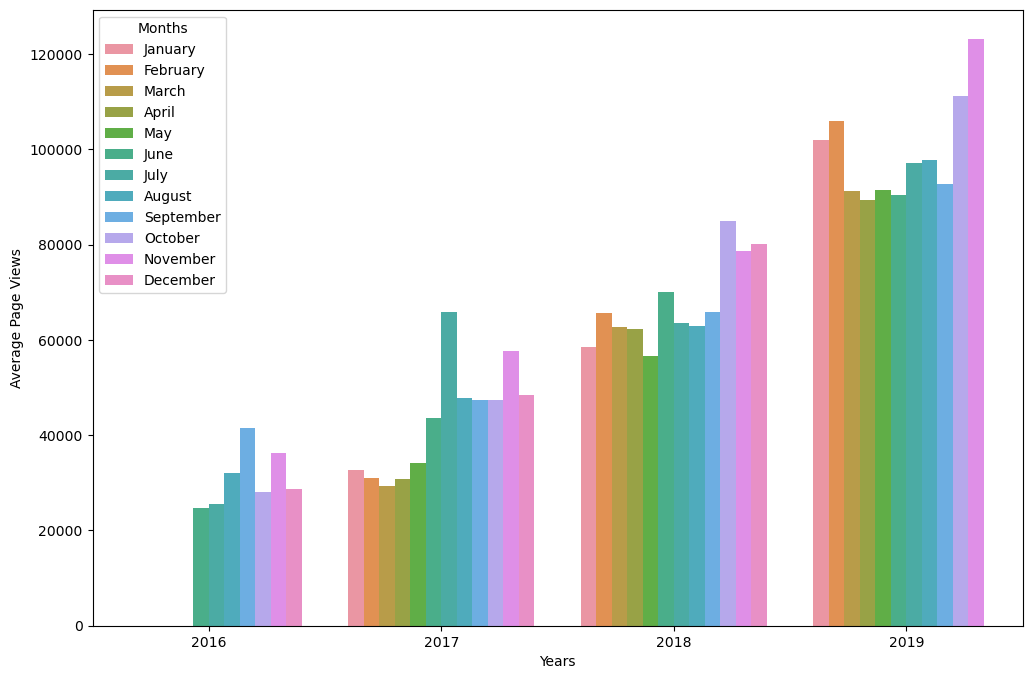

In [112]:
grouped_by_date = df.reset_index()
grouped_by_date['date'].dt.year
grouped_by_date['year_date'] = grouped_by_date['date'].dt.year
grouped_by_date['month_name'] = grouped_by_date['date'].dt.month_name()

fig, ax = plt.subplots(figsize=(12,8))

ax.set(xlabel = 'Years', ylabel='Average Page Views')

ax = sns.barplot(x='year_date', y='value', hue='month_name', data=grouped_by_date, hue_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ci=None)
ax.set(xlabel = 'Years', ylabel='Average Page Views')
ax.legend(title='Months', loc='upper left')

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot(Seasonality)')]

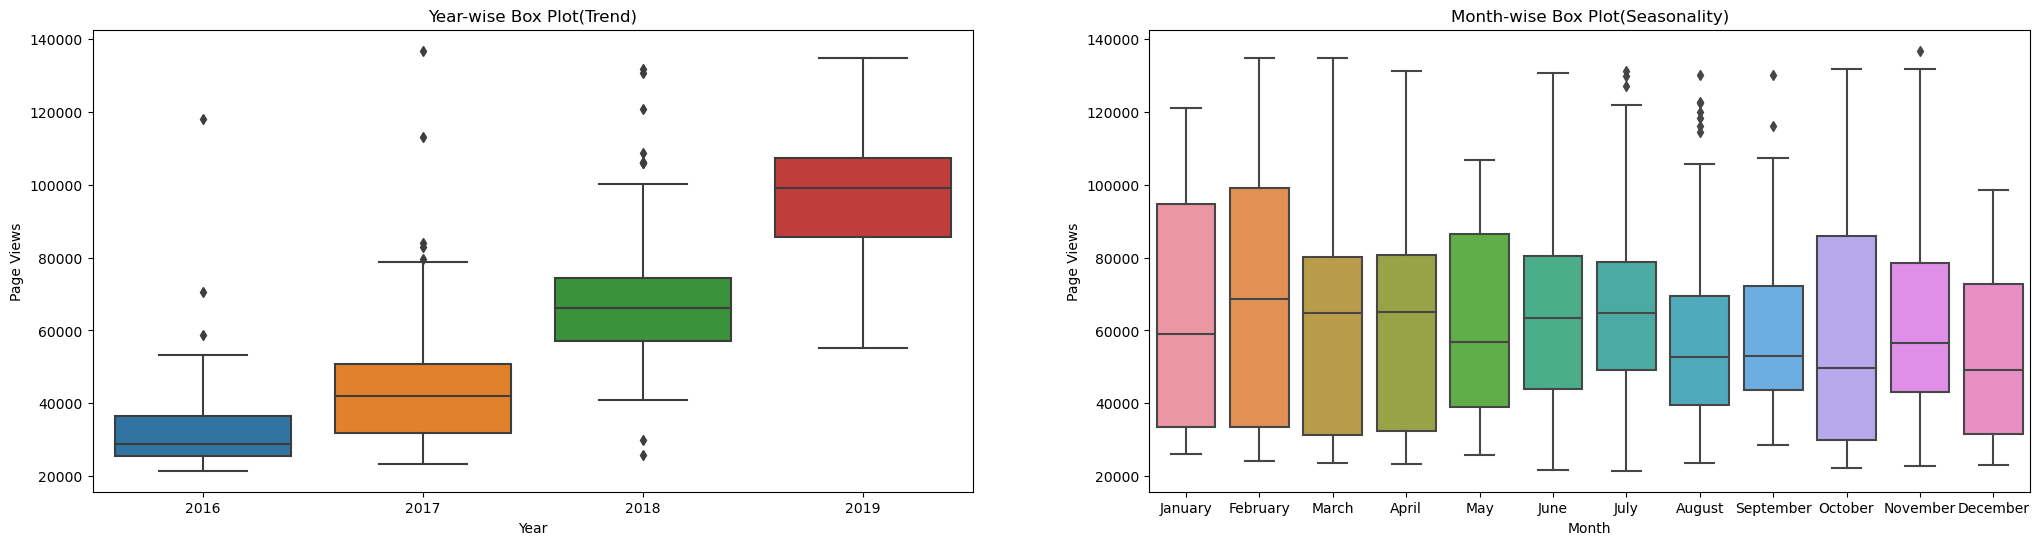

In [111]:
plt.rcParams["figure.figsize"] = [25, 6]
fig, ax = plt.subplots(1,2)
sns.boxplot(data=grouped_by_date, x='year_date', y='value', ax=ax[0])
sns.boxplot(data=grouped_by_date, x='month_name', y='value', ax=ax[1], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax[0].set(xlabel = 'Year', ylabel='Page Views', title="Year-wise Box Plot(Trend)")
ax[1].set(xlabel = 'Month', ylabel='Page Views', title="Month-wise Box Plot(Seasonality)")